In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
def replace_with_neighbor_mean(data, index):
    for i in range(len(index)) : 
        left_val = data.loc[index[i]-1]['water_height']
        right_val = data.loc[index[i]+1]['water_height']
        replace_val = 0
        if (left_val > 0) and (right_val > 0):
            replace_val = (left_val + right_val) / 2
        elif(left_val > 0):
            replace_val = left_val
        elif(right_val > 0):
            replace_val = right_val
        data.loc[index[i], 'water_height'] = replace_val
    index = []                 
            

In [3]:
data = pd.read_csv("F:\Learning\Bsc.IT(Hon)\Research Project\ShortTerm Model\Data\Maspotha Feb 23- oct 1.csv")

In [4]:
data.shape

(29782, 4)

In [5]:
data.head(5)

,urn:ogc:def:parameter:x-istsos:1.0:time:iso8601,urn:ogc:def:procedure,urn:ogc:def:parameter:x-istsos:1.0:river:water:height,urn:ogc:def:parameter:x-istsos:1.0:river:water:height:qualityIndex
0,2019-02-23T00:01:53+05:30,MASPOTHA_WL,0.30,100
1,2019-02-23T00:11:53+05:30,MASPOTHA_WL,0.29,100
2,2019-02-23T00:21:54+05:30,MASPOTHA_WL,0.29,100
3,2019-02-23T00:31:54+05:30,MASPOTHA_WL,0.29,100
4,2019-02-23T00:41:55+05:30,MASPOTHA_WL,0.30,100


### Changing Column names

In [6]:
data.rename(columns={'urn:ogc:def:parameter:x-istsos:1.0:time:iso8601':'date_time',
                     'urn:ogc:def:procedure':'station',
                     'urn:ogc:def:parameter:x-istsos:1.0:river:water:height':'water_height',
                     'urn:ogc:def:parameter:x-istsos:1.0:river:water:height:qualityIndex':'water_height_qi'
                    }, 
                 inplace=True)


In [7]:
data.head(5)

,date_time,station,water_height,water_height_qi
0,2019-02-23T00:01:53+05:30,MASPOTHA_WL,0.30,100
1,2019-02-23T00:11:53+05:30,MASPOTHA_WL,0.29,100
2,2019-02-23T00:21:54+05:30,MASPOTHA_WL,0.29,100
3,2019-02-23T00:31:54+05:30,MASPOTHA_WL,0.29,100
4,2019-02-23T00:41:55+05:30,MASPOTHA_WL,0.30,100


In [8]:
data['date_time'] = pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S')
data['date_time'] = data['date_time'].dt.strftime('%Y-%m-%d %H:%M:%S')

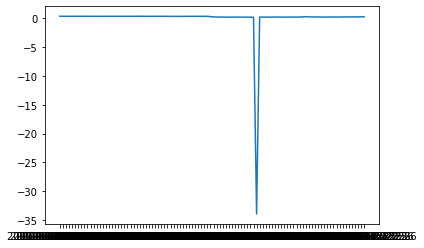

In [9]:
dp = data[:100]
plt.plot(dp['date_time'], dp['water_height'])
plt.show()

### Dropping station and water_height_ql columns

In [10]:
data = data.drop("station", axis=1)
data = data.drop("water_height_qi", axis=1)

In [11]:
data.head(5)

,date_time,water_height
0,2019-02-23 00:01:53,0.30
1,2019-02-23 00:11:53,0.29
2,2019-02-23 00:21:54,0.29
3,2019-02-23 00:31:54,0.29
4,2019-02-23 00:41:55,0.30


### Handling Negative Outliers

In [12]:
negative_index = data.index[data['water_height']<0]

In [13]:
negative_index

Int64Index([   64,   866,   893,   922,   928,   941,   981,   984,   985,
             1000,  1005,  1019,  1023,  1026,  1035,  1040,  1041,  1059,
             1067,  1069,  1070,  1071,  1073,  1074,  1075,  1077,  1093,
             1095,  1106,  1382,  1499,  1526,  1529,  1576,  1624,  1648,
             1659,  1660,  1670,  1758,  1785,  1787,  1790,  1793,  1800,
             1936,  1937,  2367,  2655,  3088,  3232,  3941,  3954,  3955,
             3957,  4134,  4228,  4229,  4396,  5543,  6978,  7114,  7122,
             7124,  7125,  7126,  7127,  7267,  7268,  7269,  7413,  7414,
             7730,  7731,  7986,  7987,  8365,  8593, 13717, 14354, 14932,
            16662, 19674, 19682, 20970, 23428, 24686, 28716],
           dtype='int64')

In [14]:
data.loc[negative_index].head(5)

,date_time,water_height
64,2019-02-23 10:42:12,-33.9
866,2019-03-01 00:37:00,-1.1
893,2019-03-01 05:07:08,-1.1
922,2019-03-01 09:57:18,-1.1
928,2019-03-01 10:57:20,-1.1


In [15]:
replace_with_neighbor_mean(data, negative_index)

In [16]:
data.loc[negative_index].head(5)

,date_time,water_height
64,2019-02-23 10:42:12,0.140
866,2019-03-01 00:37:00,0.270
893,2019-03-01 05:07:08,0.250
922,2019-03-01 09:57:18,0.095
928,2019-03-01 10:57:20,0.090


In [17]:
data.loc[negative_index].tail(5)

,date_time,water_height
19682,2019-07-15 12:20:01,0.165
20970,2019-07-24 11:13:36,0.110
23428,2019-08-14 10:42:00,0.230
24686,2019-08-23 05:39:41,0.350
28716,2019-09-23 12:26:00,0.300


### Ploting Data

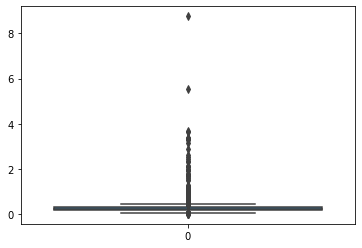

In [18]:
sns.boxplot(data=data['water_height'])

In [19]:
lower_bound = 0.001
upper_bound = 0.999
res = data.quantile([lower_bound, upper_bound])
res

,water_height
0.001,0.05000
0.999,1.53409


### Handling positive outliers

In [20]:
temp_data = data

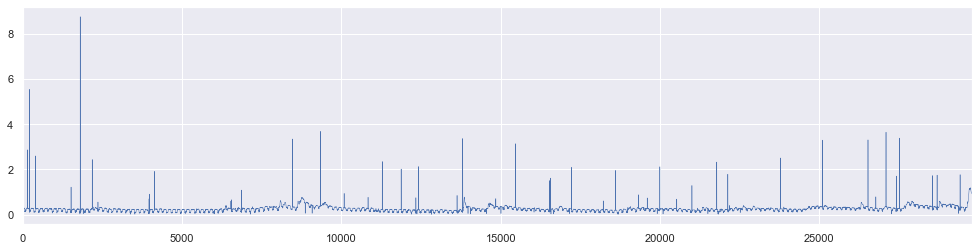

In [21]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[:]['water_height'].plot(linewidth=0.5);

Replace mean of neighbor all values above 1.5 water height

In [22]:
false_index = temp_data.index[temp_data['water_height']>1.5]
false_index

Int64Index([  146,   207,   397,  1798,  2175,  4126,  8464,  9338, 11280,
            11874, 12424, 13807, 15464, 16524, 16555, 17215, 18597, 19995,
            21782, 22129, 23786, 25096, 26530, 27096, 27425, 27523, 28555,
            28556, 28557, 28699, 28700, 29422],
           dtype='int64')

In [23]:
replace_with_neighbor_mean(temp_data, false_index)

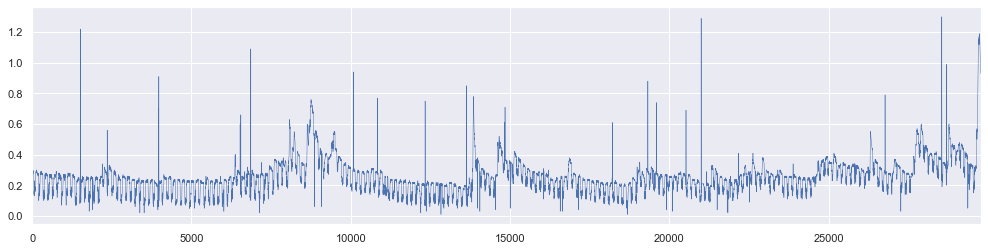

In [24]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[:]['water_height'].plot(linewidth=0.5);

In [25]:
false_index = temp_data.index[temp_data['water_height']<0.05]
false_index

Int64Index([ 1789,  1892,  3380,  3514,  3946,  6017,  7137, 12199, 12370,
            12833, 14054, 14548, 16577, 16650, 17152, 18683, 18688, 19912,
            20096, 21504, 21820, 21841, 27270],
           dtype='int64')

In [26]:
replace_with_neighbor_mean(temp_data, false_index)

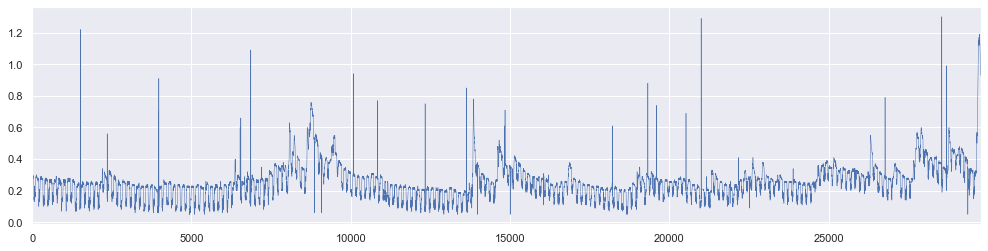

In [27]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[:]['water_height'].plot(linewidth=0.5);

#### Handling 0 to 5000 index

In [28]:
temp = temp_data[:5000]
false_index = temp.index[temp['water_height']>0.4]
false_index

Int64Index([1511, 2355, 3959, 3975], dtype='int64')

In [29]:
replace_with_neighbor_mean(temp_data, false_index)

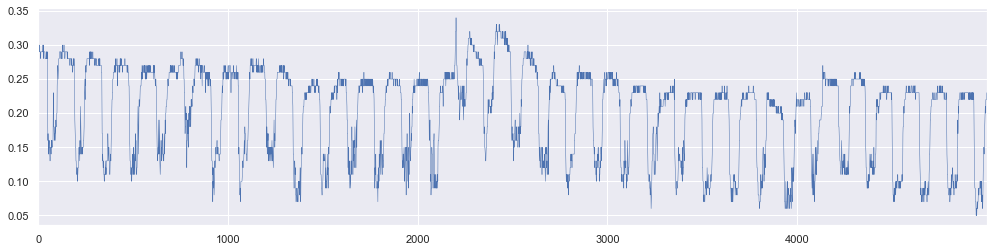

In [30]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[:5000]['water_height'].plot(linewidth=0.5);

#### Handling 5000 to 7500 index

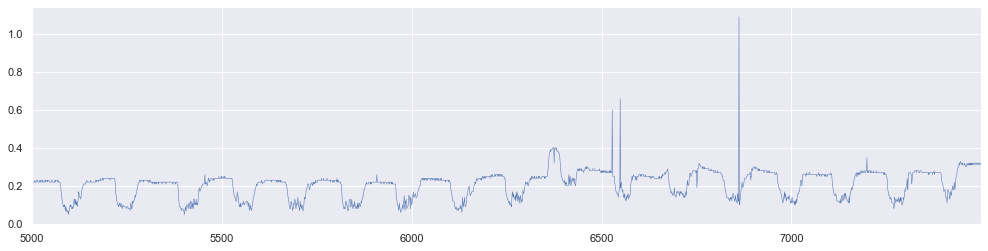

In [31]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[5000:7500]['water_height'].plot(linewidth=0.5);

In [32]:
temp = temp_data[5000:7500]
false_index = temp.index[temp['water_height']>0.5]
false_index

Int64Index([6528, 6549, 6862], dtype='int64')

In [33]:
replace_with_neighbor_mean(temp_data, false_index)

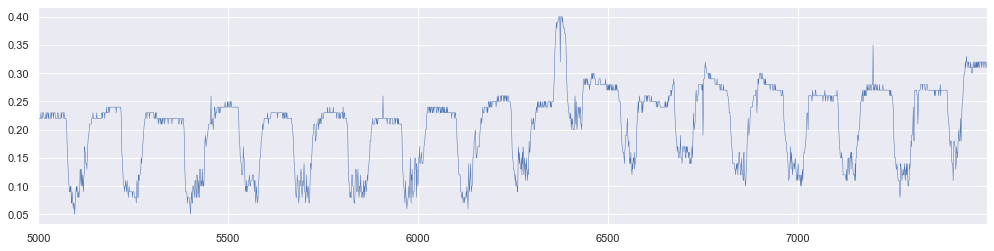

In [34]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[5000:7500]['water_height'].plot(linewidth=0.5);

#### Handling 7500 to 10000 index

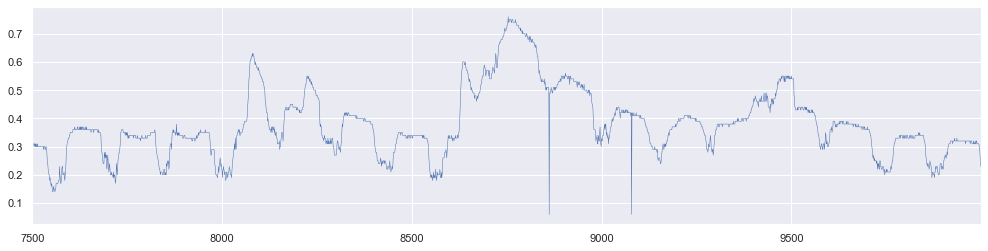

In [35]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[7500:10000]['water_height'].plot(linewidth=0.5);

In [36]:
temp = temp_data[7500:10000]
false_index = temp.index[temp['water_height']<0.1]
false_index

Int64Index([8862, 9079], dtype='int64')

In [37]:
replace_with_neighbor_mean(temp_data, false_index)

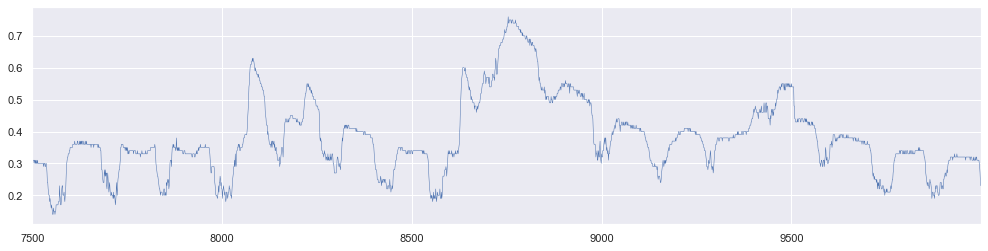

In [38]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[7500:10000]['water_height'].plot(linewidth=0.5);

#### Handling 10000 to 13700 index

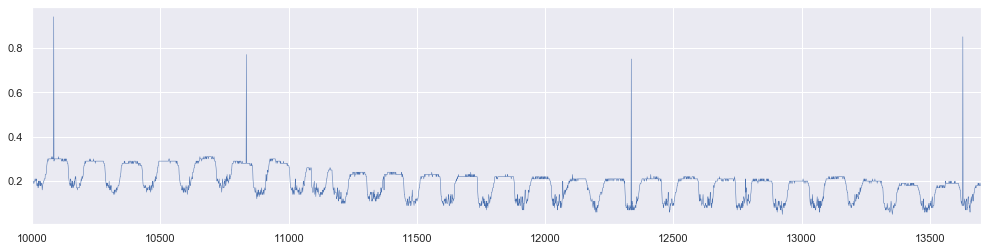

In [39]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[10000:13700]['water_height'].plot(linewidth=0.5);

In [40]:
temp = temp_data[10000:13700]
false_index = temp.index[temp['water_height']>0.5]
false_index

Int64Index([10084, 10835, 12336, 13629], dtype='int64')

In [41]:
replace_with_neighbor_mean(temp_data, false_index)

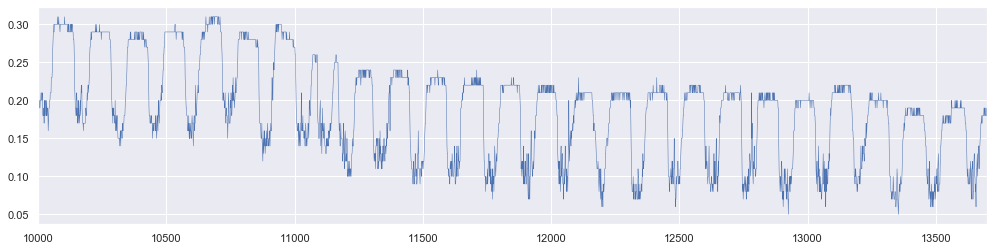

In [42]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[10000:13700]['water_height'].plot(linewidth=0.5);

In [43]:
temp = temp_data[10000:13700]
false_index = temp.index[temp['water_height']<0.05]
false_index

Int64Index([], dtype='int64')

In [44]:
replace_with_neighbor_mean(temp_data, false_index)

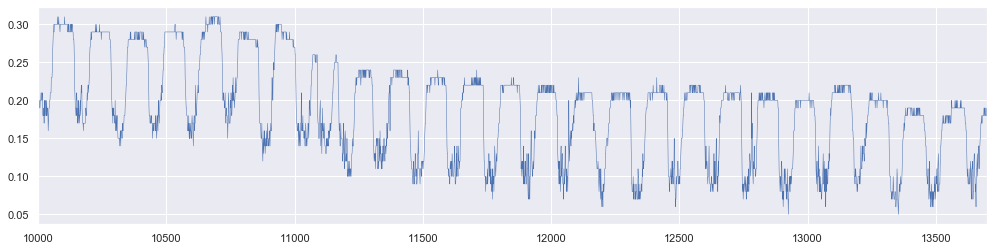

In [45]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[10000:13700]['water_height'].plot(linewidth=0.5);

###### No need to handle 13700 to 14000

#### Handling 14000 to 25000 index

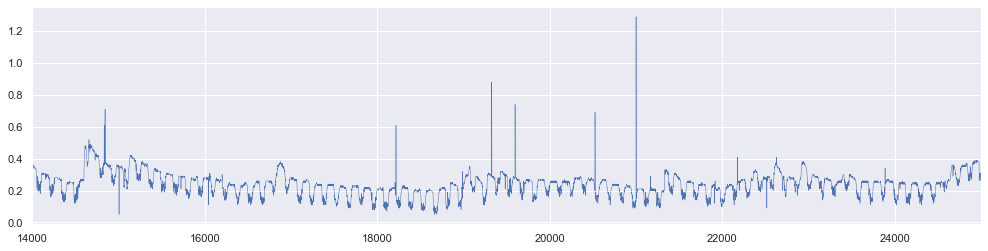

In [46]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[14000:25000]['water_height'].plot(linewidth=0.5);

In [47]:
temp = temp_data[14000:25000]
false_index = temp.index[temp['water_height']>0.55]
false_index

Int64Index([14835, 14845, 18218, 19328, 19599, 20526, 21002], dtype='int64')

In [48]:
replace_with_neighbor_mean(temp_data, false_index)

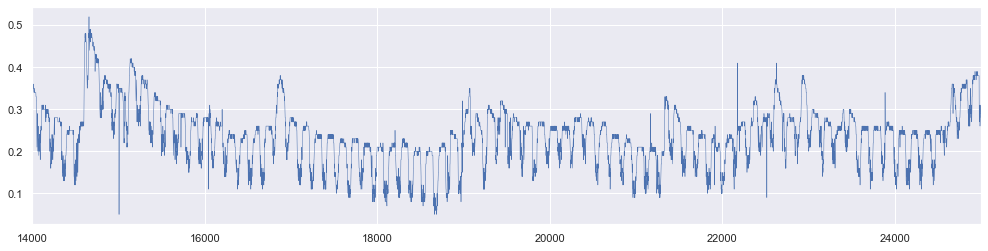

In [49]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[14000:25000]['water_height'].plot(linewidth=0.5);

In [50]:
temp = temp_data[14000:16000]
false_index = temp.index[temp['water_height']<0.1].tolist()
temp = temp_data[22000:24000]
false_index += (temp.index[temp['water_height']<0.1].tolist())
false_index

[15007, 22518]

In [51]:
replace_with_neighbor_mean(temp_data, false_index)

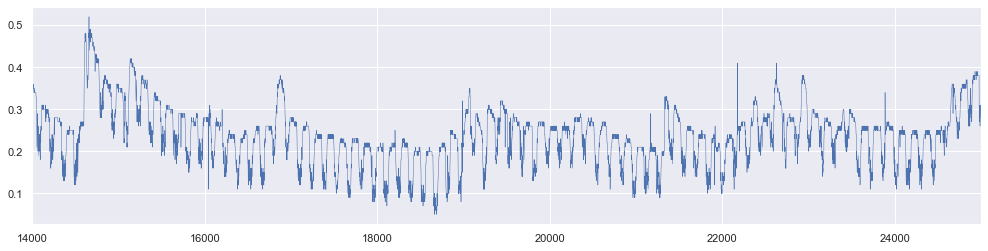

In [52]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[14000:25000]['water_height'].plot(linewidth=0.5);

#### Handling 25000 to above index

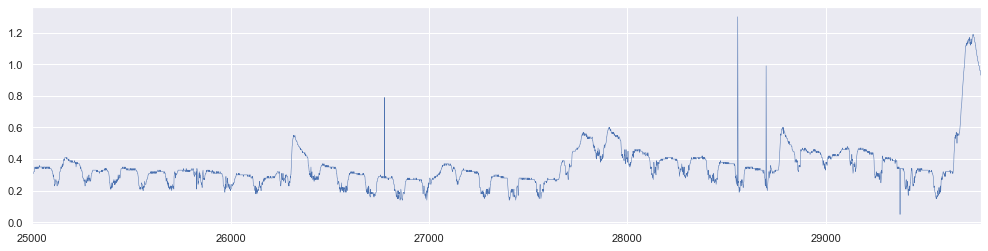

In [53]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[25000:]['water_height'].plot(linewidth=0.5);

In [54]:
temp = temp_data[25000:29000]
false_index = temp.index[temp['water_height']>0.7]
false_index

Int64Index([26776, 28555, 28556, 28557, 28699], dtype='int64')

In [55]:
replace_with_neighbor_mean(temp_data, false_index)

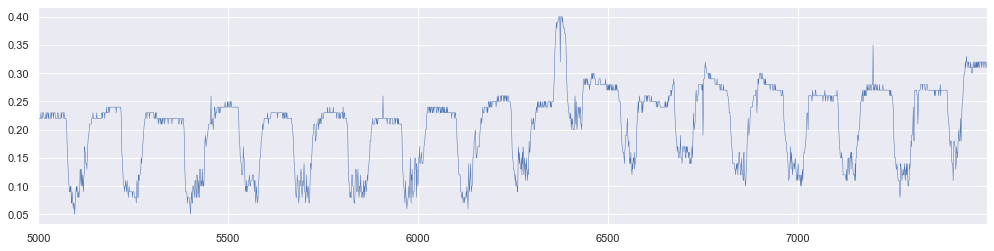

In [56]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[5000:7500]['water_height'].plot(linewidth=0.5);

# Outliers Removed Data

###### Not handled

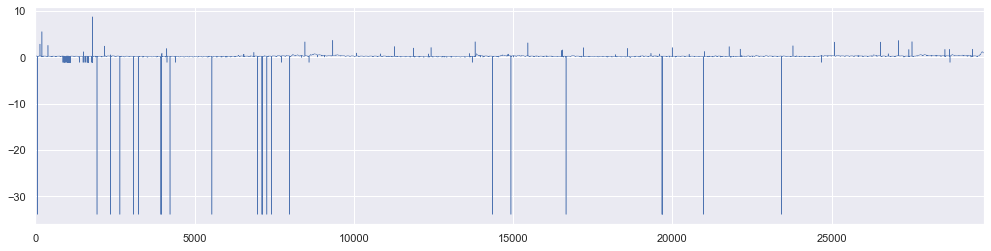

In [57]:
raw_data = pd.read_csv(".\data\Maspotha Feb 23- oct 1.csv")
raw_data.rename(columns={'urn:ogc:def:parameter:x-istsos:1.0:time:iso8601':'date_time',
                     'urn:ogc:def:procedure':'station',
                     'urn:ogc:def:parameter:x-istsos:1.0:river:water:height':'water_height',
                     'urn:ogc:def:parameter:x-istsos:1.0:river:water:height:qualityIndex':'water_height_qi'
                    }, 
                 inplace=True)

sns.set(rc={'figure.figsize':(17, 4)})
raw_data[:]['water_height'].plot(linewidth=0.5);

###### Handled

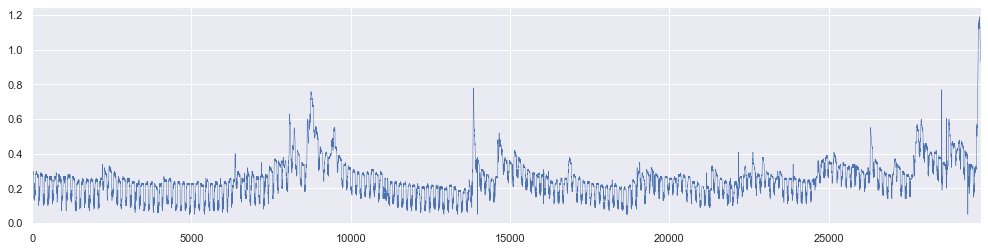

In [58]:
sns.set(rc={'figure.figsize':(17, 4)})
temp_data[:]['water_height'].plot(linewidth=0.5);

In [59]:
data = temp_data

In [60]:
export_csv = data.to_csv (r'F:\Learning\Bsc.IT(Hon)\Research Project\ShortTerm Model\Data\Outlier Removed\export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

## Changing Index

In [61]:
data = data.set_index('date_time')

In [62]:
data.index = pd.to_datetime(data.index)

In [63]:
data.head()

,water_height
date_time,
2019-02-23 00:01:53,0.30
2019-02-23 00:11:53,0.29
2019-02-23 00:21:54,0.29
2019-02-23 00:31:54,0.29
2019-02-23 00:41:55,0.30


In [64]:
data.loc['2019-08-20':'2019-10-20'].tail(5)

,water_height
date_time,
2019-10-02 23:19:56,0.96
2019-10-02 23:29:57,0.96
2019-10-02 23:39:58,0.96
2019-10-02 23:49:59,0.94
2019-10-03 00:00:00,0.93


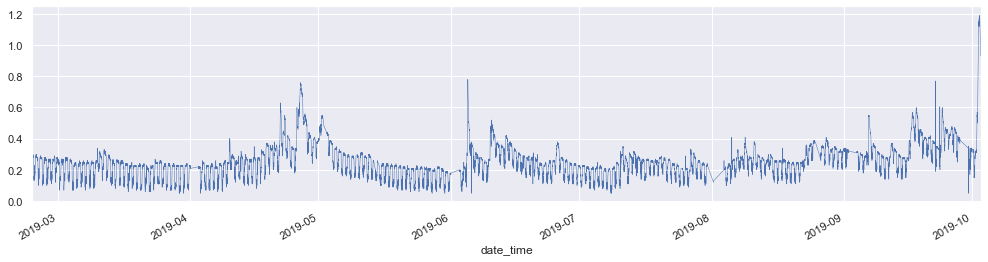

In [65]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(17, 4)})
data[:]['water_height'].plot(linewidth=0.5);

In [66]:
data.index[data['water_height']<0]

DatetimeIndex([], dtype='datetime64[ns]', name='date_time', freq=None)

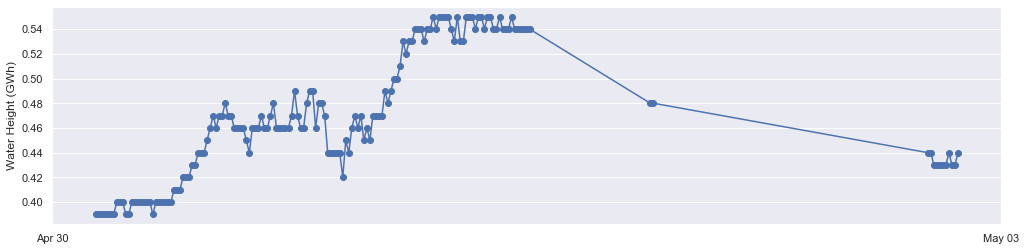

In [67]:
fig, ax = plt.subplots()
ax.plot(data.loc['2019-05-01':'2019-05-02', 'water_height'], marker='o', linestyle='-')
ax.set_ylabel('Water Height (GWh)')
#ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [68]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['water_height']
# Resample to weekly frequency, aggregating with mean
data_mean = data[data_columns].resample('H').sum()
data_mean.head(3)

,water_height
date_time,
2019-02-23 00:00:00,1.76
2019-02-23 01:00:00,1.75
2019-02-23 02:00:00,1.73


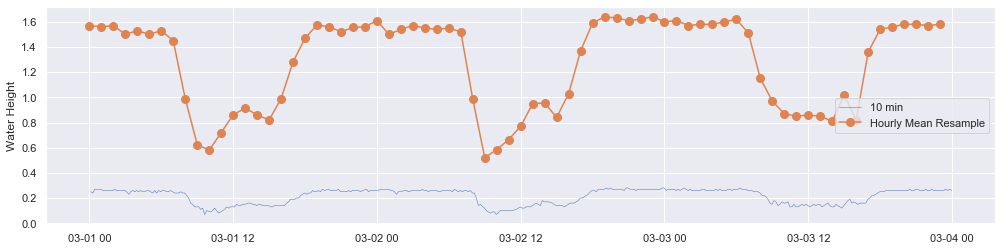

In [69]:
# Start and end of the date range to extract
start, end = '2019-03-01', '2019-03-03'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'water_height'],
marker='', linestyle='-', linewidth=0.5, label='10 min')
ax.plot(data_mean.loc[start:end, 'water_height'],
marker='o', markersize=8, linestyle='-', label='Hourly Mean Resample')
ax.set_ylabel('Water Height')
ax.legend();

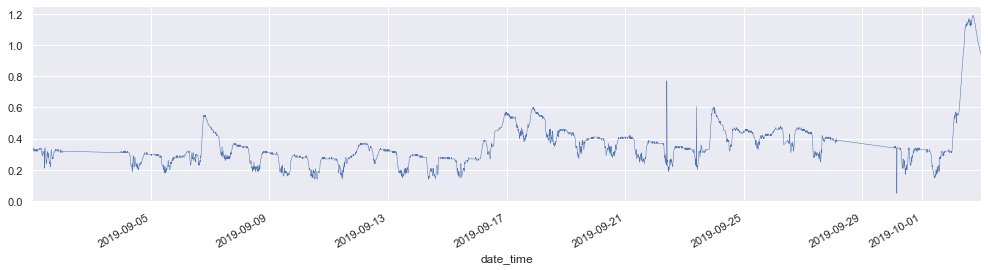

In [70]:
sns.set(rc={'figure.figsize':(17, 4)})
data['2019-09-01':'2019-10-02']['water_height'].plot(linewidth=0.5);

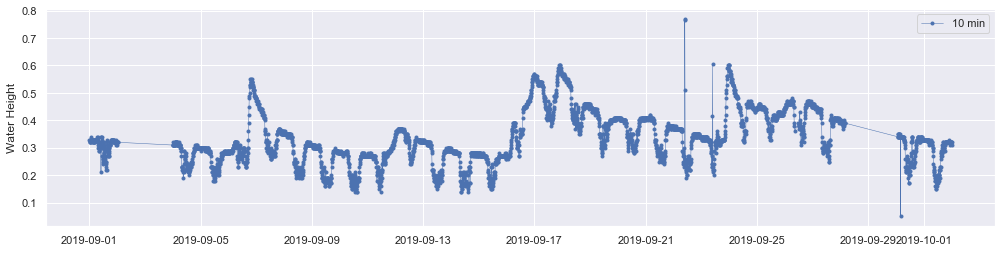

In [71]:
# Start and end of the date range to extract
start, end = '2019-09-01', '2019-10-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'water_height'],
marker='.', linestyle='-', linewidth=0.5, label='10 min')
ax.set_ylabel('Water Height')
ax.legend();

In [102]:
Data_Filtered = data.between_time('19:00','06:00')

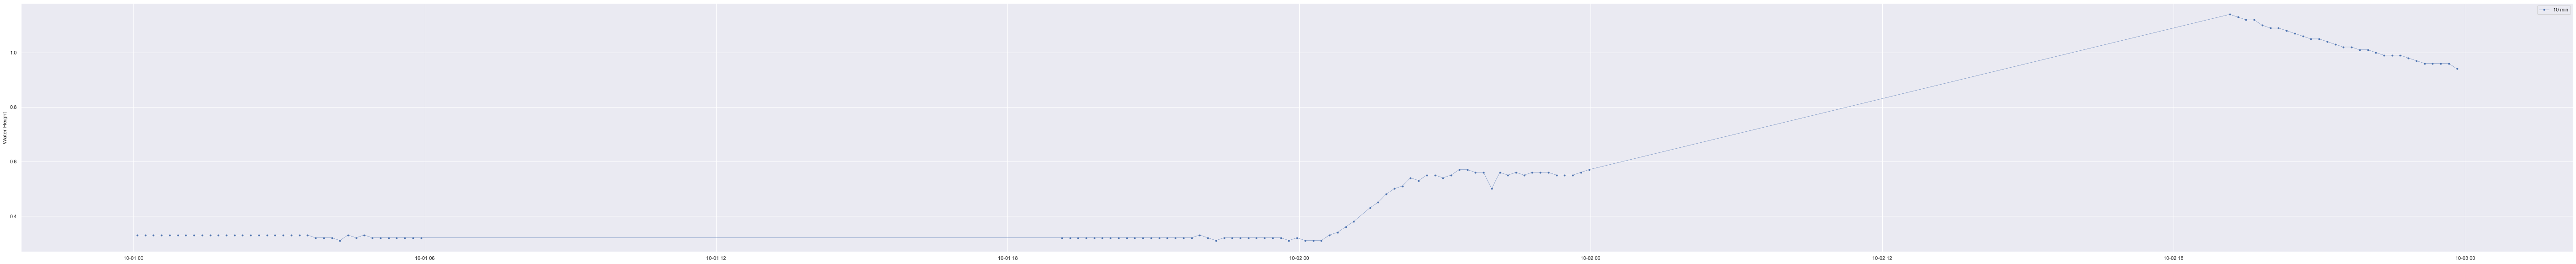

In [104]:
# Start and end of the date range to extract
start, end = '2019-10-01', '2019-10-02'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(Data_Filtered.loc[start:end, 'water_height'],
marker='.', linestyle='-', linewidth=0.5, label='10 min')
ax.set_ylabel('Water Height')
ax.legend();

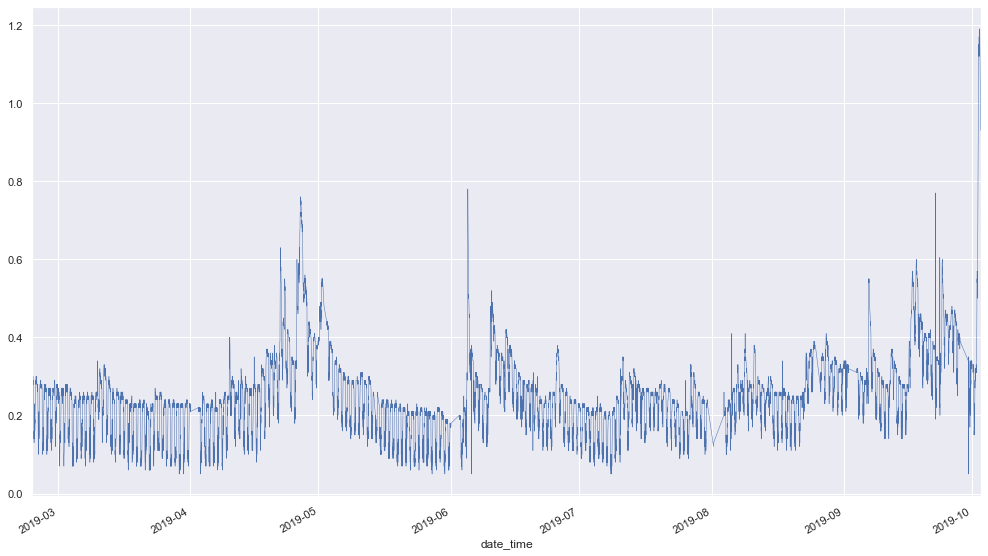

In [105]:
sns.set(rc={'figure.figsize':(17,10)})
data[:]['water_height'].plot(linewidth=0.5);

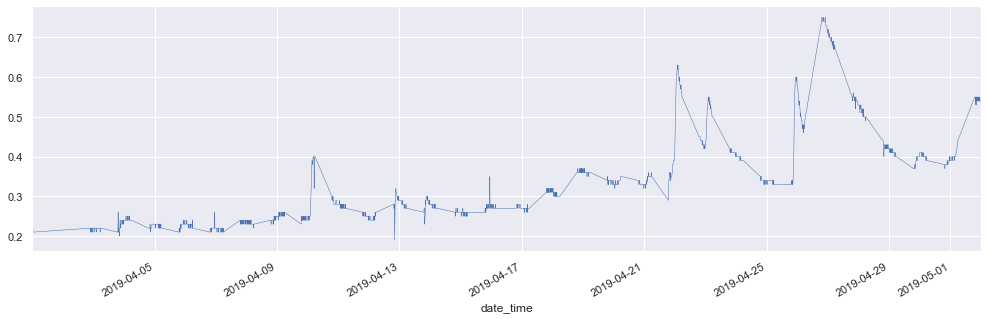

In [116]:
sns.set(rc={'figure.figsize':(17, 5)})
Data_Filtered['2019-04-01':'2019-05-1']['water_height'].plot(linewidth=0.5);

In [107]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['water_height']
# Resample to weekly frequency, aggregating with mean
Data_Filtered_Hourly = Data_Filtered[data_columns].resample('H').mean()
Data_Filtered_Hourly.head(3)

,water_height
date_time,
2019-02-23 00:00:00,0.293333
2019-02-23 01:00:00,0.291667
2019-02-23 02:00:00,0.288333


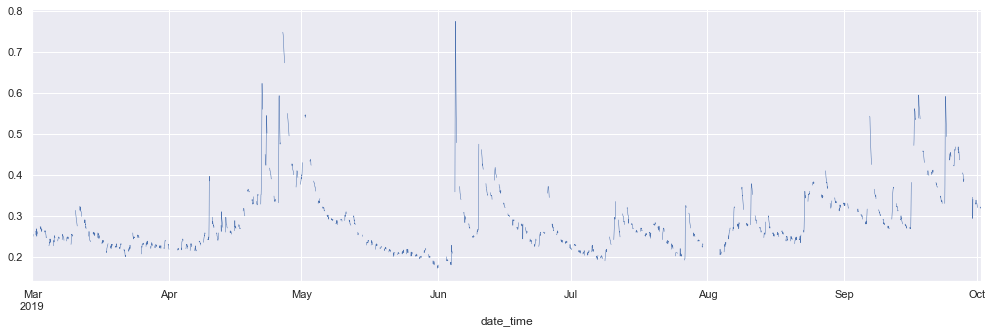

In [118]:
sns.set(rc={'figure.figsize':(17, 5)})
Data_Filtered_Hourly['2019-03-01':'2019-10-1']['water_height'].plot(linewidth=0.5);

In [113]:
Data_Filtered_Hourly.to_pickle('F:\Learning\Bsc.IT(Hon)\Research Project\ShortTerm Model\Data\Maspotha_WL_Filtered_Hourly.pkl')

In [119]:
Data_Filtered_Hourly['2019-03':'2019-10']['water_height'].shape

(5185,)